In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from patsy import dmatrices

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

from scipy import stats

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
f = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 1/forestfires.csv'
df = pd.read_csv(f)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


## Preprocessing 

In [180]:
df[['FFMC', 'DMC','DC','ISI', 'temp', 'RH', 'wind', 'rain', 'area']].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [4]:
df['fire_scale'] = df['area'].apply(lambda x: 'no fire' if (x == 0) else
                                              'small fire' if (0 < x < 2) else
                                              'large fire'
                                    )
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire_scale
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,no fire
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,no fire
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,no fire
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,no fire
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,no fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large fire
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large fire
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large fire
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,no fire


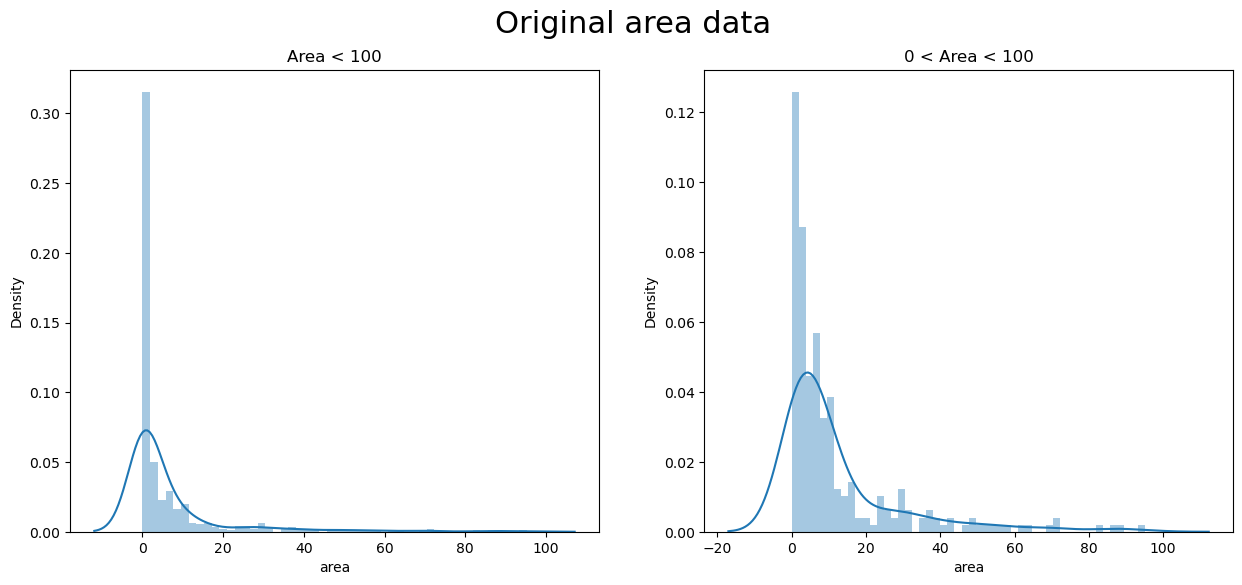

3.4960548140969356
13.881233017347077
2.4524314972288908
6.338414101356847


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

sns.distplot(df[df['area'] < 100].area, bins=50, ax=axs[0])
axs[0].set_title('Area < 100')

sns.distplot(df[(df['area'] > 0) & (df['area'] < 100)].area, bins=50, ax=axs[1])
axs[1].set_title('0 < Area < 100')

fig.suptitle('Original area data', fontsize=22)
plt.show()

print(df[df['area'] < 100].area.skew())
print(df[df['area'] < 100].area.kurt())
print(df[(df['area'] > 0) & (df['area'] < 100)].area.skew())
print(df[(df['area'] > 0) & (df['area'] < 100)].area.kurt())



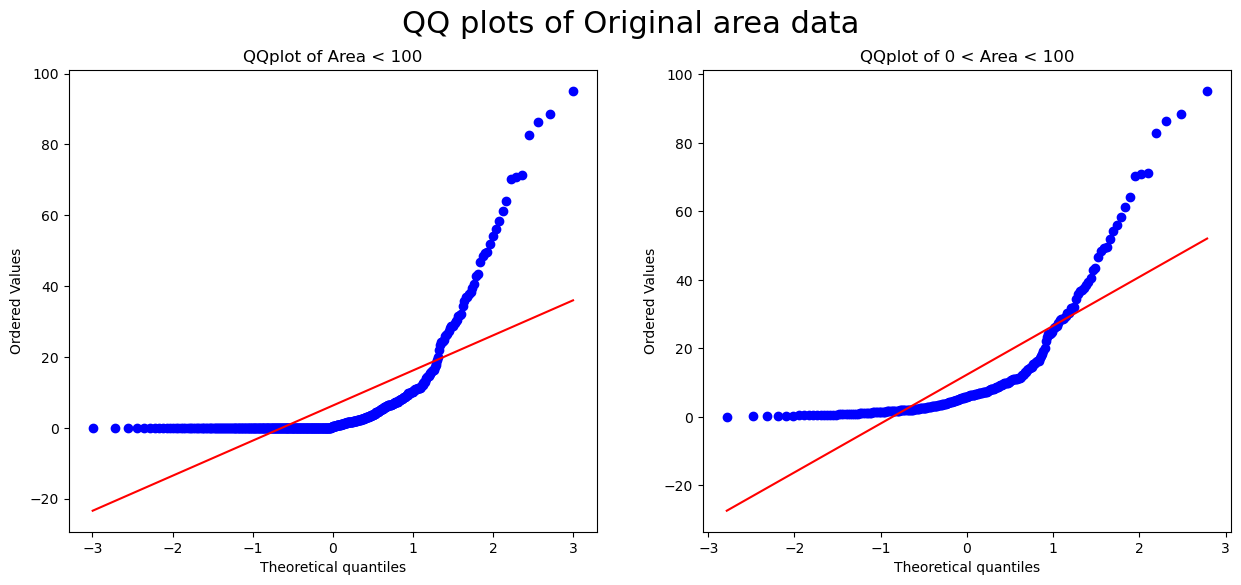

In [44]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

stats.probplot(df[df['area'] < 100].area, dist="norm", plot=axs[0])
axs[0].set_title('QQplot of Area < 100')

stats.probplot(df[(df['area'] > 0) & (df['area'] < 100)].area, dist="norm", plot=axs[1])
axs[1].set_title('QQplot of 0 < Area < 100')

fig.suptitle('QQ plots of Original area data', fontsize=22)
plt.show()

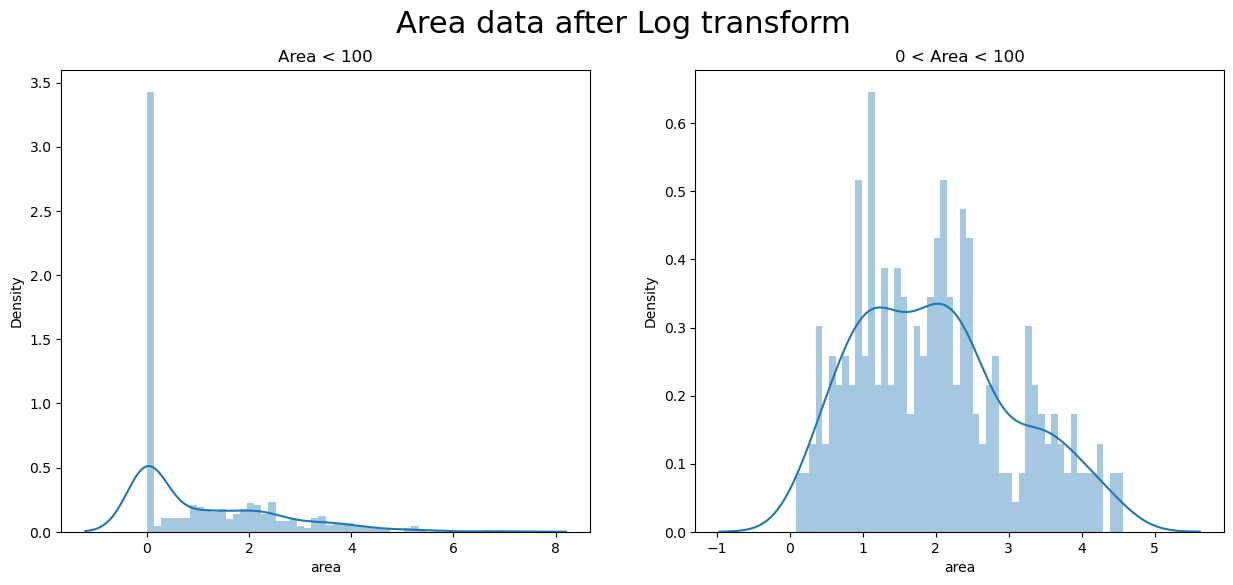

1.2178376559535011
0.9456680757207487
0.43013737895047444
-0.5955202251415992


In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

sns.distplot(np.log1p(df['area']), bins=50, ax=axs[0])
axs[0].set_title('Area < 100')

sns.distplot(np.log1p(df[(df['area'] > 0) & (df['area'] < 100)].area), bins=50, ax=axs[1])
axs[1].set_title('0 < Area < 100')

fig.suptitle('Area data after Log transform', fontsize=22)
plt.show()

print(np.log1p(df['area']).skew())
print(np.log1p(df['area']).kurt())
print(np.log1p(df[(df['area'] > 0) & (df['area'] < 100)].area).skew())
print(np.log1p(df[(df['area'] > 0) & (df['area'] < 100)].area).kurt())

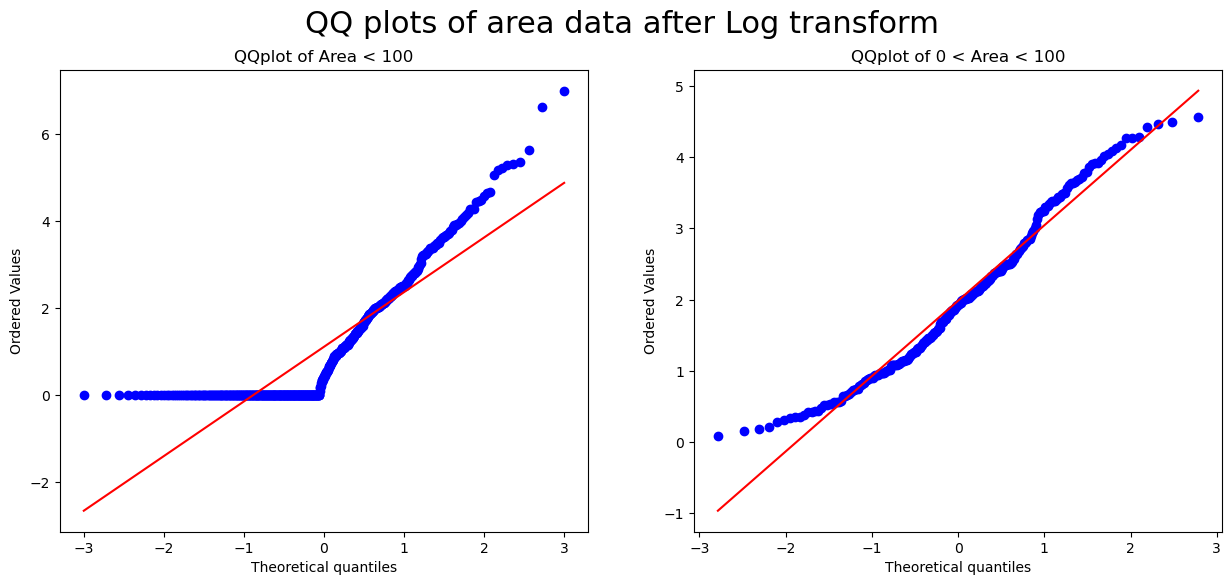

In [45]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

stats.probplot(np.log1p(df['area']), dist="norm", plot=axs[0])
axs[0].set_title('QQplot of Area < 100')

stats.probplot(np.log1p(df[(df['area'] > 0) & (df['area'] < 100)].area), dist="norm", plot=axs[1])
axs[1].set_title('QQplot of 0 < Area < 100')

fig.suptitle('QQ plots of area data after Log transform', fontsize=22)
plt.show()

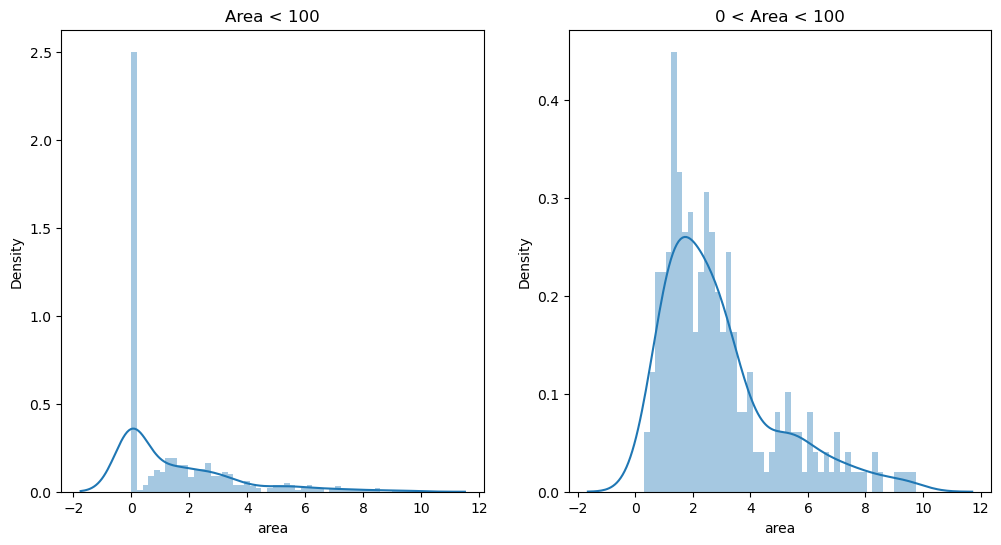

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.distplot(np.sqrt(df[df['area'] < 100].area), bins=50, ax=axs[0])
axs[0].set_title('Area < 100')

sns.distplot(np.sqrt(df[(df['area'] > 0) & (df['area'] < 100)].area), bins=50, ax=axs[1])
axs[1].set_title('0 < Area < 100')

plt.show()


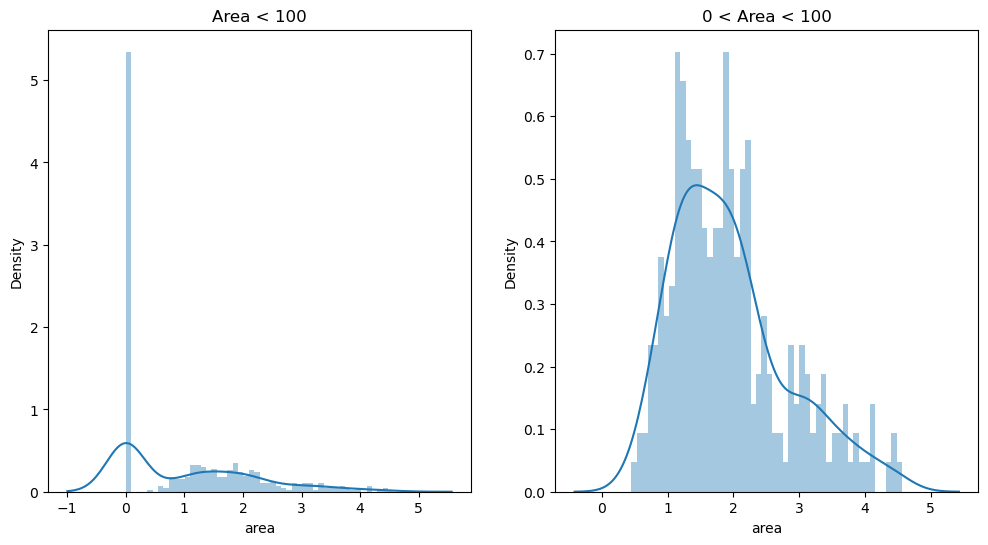

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.distplot((df[df['area'] < 100].area)**(1/3), bins=50, ax=axs[0])
axs[0].set_title('Area < 100')

sns.distplot((df[(df['area'] > 0) & (df['area'] < 100)].area)**(1/3), bins=50, ax=axs[1])
axs[1].set_title('0 < Area < 100')

plt.show()


## Yeo-Johnson transformation

## LinearRegression

In [118]:
### All
d = df.copy()

X = d.drop(['area'], axis=1)
y = d['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'All / LinearRegression',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'})

fig.show()

### SS
d = df.copy()

X = d.drop(['area'], axis=1)
y = d['area']

X = pd.get_dummies(X, columns=['month', 'day'])
X = X[['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind', 'month_dec', 'month_nov', 'day_fri']]

x_cols_for_scaling = ['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'Stepwise selection / LinearRegression',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'})

fig.show()

### STFWI
d_group = df.copy()

X = d_group.drop(['area', 'temp', 'RH', 'wind', 'rain'], axis=1)
y = d['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STFWI / LinearRegression',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'}
)
fig.show()

### STM
d_group = df.copy()

X = d_group.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI' ], axis=1)
y = d['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 5))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STM / LinearRegression',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'}
)

fig.show()

### FWI
d_group = df.copy()

X = d_group.drop(['area', 'temp', 'RH', 'wind', 'rain', 'month', 'day', 'X', 'Y'], axis=1)
y = d['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'FWI / LinearRegression',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'}
)
fig.show()

### M
d_group = df.copy()

X = d_group.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI', 'month', 'day', 'X', 'Y'], axis=1)
y = d['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 5))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'M / LinearRegression',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'}
)
fig.show()



MAD:  0.57
mse:  0.39
RMSE:  0.63
mae:  0.57
r2:  -0.12


MAD:  0.61
mse:  0.46
RMSE:  0.68
mae:  0.61
r2:  -0.04


MAD:  0.61
mse:  0.45
RMSE:  0.67
mae:  0.61
r2:  -0.03775


MAD:  0.6
mse:  0.42
RMSE:  0.65
mae:  0.6
r2:  -0.01


MAD:  0.59
mse:  0.4
RMSE:  0.63
mae:  0.59
r2:  0.00244


In [91]:
cat_col = ['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']
num_col = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

## Upsampling & Yeo-Johnson transform

### Yeo-Johnson transform + Upsampling

In [183]:
### All
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'All / LinearRegression / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### Stepwise selection
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])
X = X[['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind', 'month_dec', 'month_nov', 'day_fri']]

x_cols_for_scaling = ['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'Stepwise selection / LinearRegression / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()


### STFWI
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'temp', 'RH', 'wind', 'rain'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns = ['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STFWI / LinearRegression / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### STM
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STM / LinearRegression / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()


### FWI
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area','X', 'Y', 'temp', 'RH', 'wind', 'rain', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'FWI / LinearRegression / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### M
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area','X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'M / LinearRegression / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

MAD:  0.39
mse:  0.25
RMSE:  0.5
mae:  0.39
r2:  0.34


MAD:  0.42
mse:  0.26
RMSE:  0.51
mae:  0.42
r2:  0.31


MAD:  0.41
mse:  0.26
RMSE:  0.51
mae:  0.41
r2:  0.35


MAD:  0.4
mse:  0.25
RMSE:  0.5
mae:  0.4
r2:  0.37


MAD:  0.56
mse:  0.37
RMSE:  0.61
mae:  0.56
r2:  0.06


MAD:  0.56
mse:  0.38
RMSE:  0.62
mae:  0.56
r2:  0.13


### Yeo-Johnson transform + Upsampling without 0

In [200]:
### All
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))
fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'All / LinearRegression / Upsample / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### SS
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

X = X[['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind', 'month_dec', 'day_fri']]

x_cols_for_scaling = ['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'Stepwise selection / LinearRegression / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'})

fig.show()

### STFWI
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'temp', 'RH', 'wind', 'rain'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns = ['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))
fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STFWI / LinearRegression / Upsample / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### STM
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))
fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STM / LinearRegression / Upsample / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### FWI
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area','X', 'Y', 'temp', 'RH', 'wind', 'rain', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))
fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'FWI / LinearRegression / Upsample / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### M
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area','X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = LinearRegression()
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'M / LinearRegression / Upsample / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

MAD:  0.44
mse:  0.37
RMSE:  0.61
mae:  0.44
r2:  0.37


MAD:  0.66
mse:  0.7
RMSE:  0.83
mae:  0.66
r2:  0.05


MAD:  0.46
mse:  0.43
RMSE:  0.65
mae:  0.46
r2:  0.39


MAD:  0.49
mse:  0.44
RMSE:  0.66
mae:  0.49
r2:  0.34


MAD:  0.66
mse:  0.68
RMSE:  0.82
mae:  0.66
r2:  0.03


MAD:  0.67
mse:  0.65
RMSE:  0.81
mae:  0.67
r2:  0.02


## SVM Regression

### Yeo-Johnson transform

In [288]:
### All
d = df.copy()

X = d.drop(['area'], axis=1)
y = d['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'All / SVM',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### Stepwise selection
d = df.copy()

X = d.drop(['area'], axis=1)
y = d['area']

X = pd.get_dummies(X, columns=['month', 'day'])
X = X[['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind', 'month_dec', 'month_nov', 'day_fri']]

x_cols_for_scaling = ['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'Stepwise selection / SVM',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()


### STFWI
d = df.copy()

X = d.drop(['area', 'temp', 'RH', 'wind', 'rain'], axis=1)
y = d['area']

X = pd.get_dummies(X, columns = ['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STFWI / SVM',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### STM
d = df.copy()

X = d.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)
y = d['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STM / SVM',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()


### FWI
d = df.copy()

X = d.drop(['area','X', 'Y', 'temp', 'RH', 'wind', 'rain', 'month', 'day'], axis=1)
y = d['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'FWI / SVM',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### M
d = df.copy()

X = d.drop(['area','X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'month', 'day'], axis=1)
y = d['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'M / SVM',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

MAD:  0.58
mse:  0.45
RMSE:  0.67
mae:  0.58
r2:  -0.13


MAD:  0.6
mse:  0.51
RMSE:  0.71
mae:  0.6
r2:  -0.07


MAD:  0.58
mse:  0.48
RMSE:  0.69
mae:  0.58
r2:  -0.19


MAD:  0.57
mse:  0.44
RMSE:  0.67
mae:  0.57
r2:  -0.0


MAD:  0.63
mse:  0.58
RMSE:  0.76
mae:  0.63
r2:  -0.26


MAD:  0.57
mse:  0.48
RMSE:  0.69
mae:  0.57
r2:  -0.06


### Yeo-Johnson transform + Upsample

In [274]:
### All
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'All / SVM / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### Stepwise selection
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])
X = X[['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind', 'month_dec', 'month_nov', 'day_fri']]

x_cols_for_scaling = ['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'Stepwise selection / SVM / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()


### STFWI
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'temp', 'RH', 'wind', 'rain'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns = ['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STFWI / SVM / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### STM
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STM / SVM / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()


### FWI
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area','X', 'Y', 'temp', 'RH', 'wind', 'rain', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'FWI / SVM / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)

fig.show()

### M
d = df.copy()
d_up = df.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area','X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'M / SVM / Upsample',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

MAD:  0.39
mse:  0.29
RMSE:  0.54
mae:  0.39
r2:  0.21


MAD:  0.36
mse:  0.27
RMSE:  0.52
mae:  0.36
r2:  0.36


### Yeo-Johnson transform + Upsampling without 0

In [269]:
# ### All
# d = df[df['area']>0].copy()
# d_up = d.copy()

# for m in d['month'].unique():
#     if((m != 'aug') & (m != 'sep')):
#         temp = d[d['month'] == m].sample(200, replace = True)
#         if d is d_up:
#             d_up = pd.concat([d, temp], axis = 0)
#         else:
#             d_up = pd.concat([d_up, temp], axis = 0)

# X = d_up.drop(['area'], axis=1)
# y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

# x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

# x_train_orig = x_train.loc[:, x_cols_for_scaling]
# x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

# x_test_orig = x_test.loc[:, x_train_orig.columns]
# x_test_cat = x_test.loc[:, x_train_cat.columns]

# scl = StandardScaler()
# x_train_orig = scl.fit_transform(x_train_orig)

# # apply yeojohnson transformation to out columns after splitting data
# y_train_transformed, lambda_train = stats.yeojohnson(y_train)
# y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# x_test_orig = scl.transform(x_test_orig)

# # Combine the scaled numerical features with the categorical features
# x_train = np.hstack((x_train_orig, x_train_cat))
# x_test = np.hstack((x_test_orig, x_test_cat))

# reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
# reg.fit(x_train, y_train_transformed)

# y_pred = reg.predict(x_test)

# mad = np.mean(np.abs(y_test_transformed - y_pred))
# print('MAD: ', np.round(mad, 2))

# mse = metrics.mean_squared_error(y_test_transformed, y_pred)
# print('mse: ', np.round(mse, 2))

# rmse = np.sqrt(mse)
# print('RMSE: ', np.round(rmse, 2))

# mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
# print('mae: ', np.round(mae, 2))

# r2 = metrics.r2_score(y_test_transformed, y_pred)
# print('r2: ', np.round(r2, 2))

# fig = px.scatter(
#     y = y_test_transformed, 
#     x = y_pred,
#     labels={'y': 'Actual', 'x': 'Predicted'}, 
#     trendline='ols'
#     )

# fig.update_layout(
#     title = {
#         'text':'All / SVM / Upsample / Without area = 0',
#         'x':0.5,
#         'font':{
#             'size': 32
#         }
#     },
#     yaxis_title = {
#         'font':{'size':20},
#         'text':'Actual'},
#     xaxis_title = {
#         'font':{'size':20},
#         'text':'Predicted'}
# )

# fig.show()

# ### Stepwise selection
# d = df[df['area']>0].copy()
# d_up = d.copy()

# for m in d['month'].unique():
#     if((m != 'aug') & (m != 'sep')):
#         temp = d[d['month'] == m].sample(200, replace = True)
#         if d is d_up:
#             d_up = pd.concat([d, temp], axis = 0)
#         else:
#             d_up = pd.concat([d_up, temp], axis = 0)

# X = d_up.drop(['area'], axis=1)
# y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])
# X = X[['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind', 'month_dec', 'day_fri']]

# x_cols_for_scaling = ['X', 'FFMC', 'DMC', 'ISI', 'temp', 'wind']

# x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

# x_train_orig = x_train.loc[:, x_cols_for_scaling]
# x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

# x_test_orig = x_test.loc[:, x_train_orig.columns]
# x_test_cat = x_test.loc[:, x_train_cat.columns]

# scl = StandardScaler()
# x_train_orig = scl.fit_transform(x_train_orig)

# # apply yeojohnson transformation to out columns after splitting data
# y_train_transformed, lambda_train = stats.yeojohnson(y_train)
# y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# x_test_orig = scl.transform(x_test_orig)

# # Combine the scaled numerical features with the categorical features
# x_train = np.hstack((x_train_orig, x_train_cat))
# x_test = np.hstack((x_test_orig, x_test_cat))

# reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
# reg.fit(x_train, y_train_transformed)

# y_pred = reg.predict(x_test)

# mad = np.mean(np.abs(y_test_transformed - y_pred))
# print('MAD: ', np.round(mad, 2))

# mse = metrics.mean_squared_error(y_test_transformed, y_pred)
# print('mse: ', np.round(mse, 2))

# rmse = np.sqrt(mse)
# print('RMSE: ', np.round(rmse, 2))

# mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
# print('mae: ', np.round(mae, 2))

# r2 = metrics.r2_score(y_test_transformed, y_pred)
# print('r2: ', np.round(r2, 2))

# fig = px.scatter(
#     y = y_test_transformed, 
#     x = y_pred,
#     labels={'y': 'Actual', 'x': 'Predicted'}, 
#     trendline='ols'
#     )

# fig.update_layout(
#     title = {
#         'text':'Stepwise selection / SVM / Upsample / Without area = 0',
#         'x':0.5,
#         'font':{
#             'size': 32
#         }
#     },
#     yaxis_title = {
#         'font':{'size':20},
#         'text':'Actual'},
#     xaxis_title = {
#         'font':{'size':20},
#         'text':'Predicted'}
# )

# fig.show()


# ### STFWI
# d = df[df['area']>0].copy()
# d_up = d.copy()

# for m in d['month'].unique():
#     if((m != 'aug') & (m != 'sep')):
#         temp = d[d['month'] == m].sample(200, replace = True)
#         if d is d_up:
#             d_up = pd.concat([d, temp], axis = 0)
#         else:
#             d_up = pd.concat([d_up, temp], axis = 0)

# X = d_up.drop(['area', 'temp', 'RH', 'wind', 'rain'], axis=1)
# y = d_up['area']

# X = pd.get_dummies(X, columns = ['month', 'day'])

# x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI']

# x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

# x_train_orig = x_train.loc[:, x_cols_for_scaling]
# x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

# x_test_orig = x_test.loc[:, x_train_orig.columns]
# x_test_cat = x_test.loc[:, x_train_cat.columns]

# scl = StandardScaler()
# x_train_orig = scl.fit_transform(x_train_orig)

# # apply yeojohnson transformation to out columns after splitting data
# y_train_transformed, lambda_train = stats.yeojohnson(y_train)
# y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# x_test_orig = scl.transform(x_test_orig)

# # Combine the scaled numerical features with the categorical features
# x_train = np.hstack((x_train_orig, x_train_cat))
# x_test = np.hstack((x_test_orig, x_test_cat))

# reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
# reg.fit(x_train, y_train_transformed)

# y_pred = reg.predict(x_test)

# mad = np.mean(np.abs(y_test_transformed - y_pred))
# print('MAD: ', np.round(mad, 2))

# mse = metrics.mean_squared_error(y_test_transformed, y_pred)
# print('mse: ', np.round(mse, 2))

# rmse = np.sqrt(mse)
# print('RMSE: ', np.round(rmse, 2))

# mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
# print('mae: ', np.round(mae, 2))

# r2 = metrics.r2_score(y_test_transformed, y_pred)
# print('r2: ', np.round(r2, 2))

# fig = px.scatter(
#     y = y_test_transformed, 
#     x = y_pred,
#     labels={'y': 'Actual', 'x': 'Predicted'}, 
#     trendline='ols'
#     )

# fig.update_layout(
#     title = {
#         'text':'STFWI / SVM / Upsample / Without area = 0',
#         'x':0.5,
#         'font':{
#             'size': 32
#         }
#     },
#     yaxis_title = {
#         'font':{'size':20},
#         'text':'Actual'},
#     xaxis_title = {
#         'font':{'size':20},
#         'text':'Predicted'}
# )

# fig.show()

# ### STM
# d = df[df['area']>0].copy()
# d_up = d.copy()

# for m in d['month'].unique():
#     if((m != 'aug') & (m != 'sep')):
#         temp = d[d['month'] == m].sample(200, replace = True)
#         if d is d_up:
#             d_up = pd.concat([d, temp], axis = 0)
#         else:
#             d_up = pd.concat([d_up, temp], axis = 0)

# X = d_up.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)
# y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

# x_cols_for_scaling = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']

# x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

# x_train_orig = x_train.loc[:, x_cols_for_scaling]
# x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

# x_test_orig = x_test.loc[:, x_train_orig.columns]
# x_test_cat = x_test.loc[:, x_train_cat.columns]

# scl = StandardScaler()
# x_train_orig = scl.fit_transform(x_train_orig)

# # apply yeojohnson transformation to out columns after splitting data
# y_train_transformed, lambda_train = stats.yeojohnson(y_train)
# y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# x_test_orig = scl.transform(x_test_orig)

# # Combine the scaled numerical features with the categorical features
# x_train = np.hstack((x_train_orig, x_train_cat))
# x_test = np.hstack((x_test_orig, x_test_cat))

# reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
# reg.fit(x_train, y_train_transformed)

# y_pred = reg.predict(x_test)

# mad = np.mean(np.abs(y_test_transformed - y_pred))
# print('MAD: ', np.round(mad, 2))

# mse = metrics.mean_squared_error(y_test_transformed, y_pred)
# print('mse: ', np.round(mse, 2))

# rmse = np.sqrt(mse)
# print('RMSE: ', np.round(rmse, 2))

# mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
# print('mae: ', np.round(mae, 2))

# r2 = metrics.r2_score(y_test_transformed, y_pred)
# print('r2: ', np.round(r2, 2))

# fig = px.scatter(
#     y = y_test_transformed, 
#     x = y_pred,
#     labels={'y': 'Actual', 'x': 'Predicted'}, 
#     trendline='ols'
#     )

# fig.update_layout(
#     title = {
#         'text':'STM / SVM / Upsample / Without area = 0',
#         'x':0.5,
#         'font':{
#             'size': 32
#         }
#     },
#     yaxis_title = {
#         'font':{'size':20},
#         'text':'Actual'},
#     xaxis_title = {
#         'font':{'size':20},
#         'text':'Predicted'}
# )
# fig.show()


# ### FWI
# d = df[df['area']>0].copy()
# d_up = d.copy()

# for m in d['month'].unique():
#     if((m != 'aug') & (m != 'sep')):
#         temp = d[d['month'] == m].sample(200, replace = True)
#         if d is d_up:
#             d_up = pd.concat([d, temp], axis = 0)
#         else:
#             d_up = pd.concat([d_up, temp], axis = 0)

# X = d_up.drop(['area','X', 'Y', 'temp', 'RH', 'wind', 'rain', 'month', 'day'], axis=1)
# y = d_up['area']

# # X = pd.get_dummies(X, columns=['month', 'day'])

# x_cols_for_scaling = ['FFMC', 'DMC', 'DC', 'ISI']

# x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

# x_train_orig = x_train.loc[:, x_cols_for_scaling]
# x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

# x_test_orig = x_test.loc[:, x_train_orig.columns]
# x_test_cat = x_test.loc[:, x_train_cat.columns]

# scl = StandardScaler()
# x_train_orig = scl.fit_transform(x_train_orig)

# # apply yeojohnson transformation to out columns after splitting data
# y_train_transformed, lambda_train = stats.yeojohnson(y_train)
# y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# x_test_orig = scl.transform(x_test_orig)

# x_train = np.hstack((x_train_orig, x_train_cat))
# x_test = np.hstack((x_test_orig, x_test_cat))

# reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
# reg.fit(x_train, y_train_transformed)

# y_pred = reg.predict(x_test)

# mad = np.mean(np.abs(y_test_transformed - y_pred))
# print('MAD: ', np.round(mad, 2))

# mse = metrics.mean_squared_error(y_test_transformed, y_pred)
# print('mse: ', np.round(mse, 2))

# rmse = np.sqrt(mse)
# print('RMSE: ', np.round(rmse, 2))

# mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
# print('mae: ', np.round(mae, 2))

# r2 = metrics.r2_score(y_test_transformed, y_pred)
# print('r2: ', np.round(r2, 2))

# fig = px.scatter(
#     y = y_test_transformed, 
#     x = y_pred,
#     labels={'y': 'Actual', 'x': 'Predicted'}, 
#     trendline='ols'
#     )

# fig.update_layout(
#     title = {
#         'text':'FWI / SVM / Upsample / Without area = 0',
#         'x':0.5,
#         'font':{
#             'size': 32
#         }
#     },
#     yaxis_title = {
#         'font':{'size':20},
#         'text':'Actual'},
#     xaxis_title = {
#         'font':{'size':20},
#         'text':'Predicted'}
# )

# fig.show()

### M
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area','X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mad = np.mean(np.abs(y_test_transformed - y_pred))
print('MAD: ', np.round(mad, 2))

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('mse: ', np.round(mse, 2))

rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('mae: ', np.round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', np.round(r2, 2))

fig = px.scatter(
    y = y_test_transformed, 
    x = y_pred,
    labels={'y': 'Actual', 'x': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'M / SVM / Upsample / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    yaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    xaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

MAD:  0.44
mse:  0.44
RMSE:  0.67
mae:  0.44
r2:  0.31


In [178]:
### All
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('MSE: ', round(mse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('MAE: ', round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', round(r2, 2))

fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'All / SVM / Upsampling / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

### STFWI
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'temp', 'RH', 'wind', 'rain'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('MSE: ', round(mse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('MAE: ', round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', round(r2, 2))

fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STFWI / SVM / Upsampling / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

### STM
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)
y = d_up['area']

X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('MSE: ', round(mse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('MAE: ', round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', round(r2, 2))

fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'STM / SVM / Upsampling / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()
### FWI
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['X', 'Y', 'area', 'month', 'day', 'temp', 'RH', 'wind', 'rain'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['FFMC', 'DMC', 'DC', 'ISI']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('MSE: ', round(mse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('MAE: ', round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', round(r2, 2))

fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'FWI / SVM / Upsampling / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

### M
d = df[df['area']>0].copy()
d_up = d.copy()

for m in d['month'].unique():
    if((m != 'aug') & (m != 'sep')):
        temp = d[d['month'] == m].sample(200, replace = True)
        if d is d_up:
            d_up = pd.concat([d, temp], axis = 0)
        else:
            d_up = pd.concat([d_up, temp], axis = 0)

X = d_up.drop(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'area', 'month', 'day'], axis=1)
y = d_up['area']

# X = pd.get_dummies(X, columns=['month', 'day'])

x_cols_for_scaling = ['temp', 'RH', 'wind', 'rain']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 42)

x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

scl = StandardScaler()
x_train_orig = scl.fit_transform(x_train_orig)

# apply yeojohnson transformation to out columns after splitting data
y_train_transformed, lambda_train = stats.yeojohnson(y_train)
y_test_transformed = stats.yeojohnson(y_test, lambda_train)

# Scale the test set using the StandardScaler fitted on the train set
x_test_orig = scl.transform(x_test_orig)

# Combine the scaled numerical features with the categorical features
x_train = np.hstack((x_train_orig, x_train_cat))
x_test = np.hstack((x_test_orig, x_test_cat))

reg = svm.SVR(C = 1, kernel = 'rbf', gamma = 'auto', max_iter = int(5e4), cache_size = 1000) #kernel 高斯轉換 Radial Basis Function
reg.fit(x_train, y_train_transformed)

y_pred = reg.predict(x_test)

mse = metrics.mean_squared_error(y_test_transformed, y_pred)
print('MSE: ', round(mse, 2))

mae = metrics.mean_absolute_error(y_test_transformed, y_pred)
print('MAE: ', round(mae, 2))

r2 = metrics.r2_score(y_test_transformed, y_pred)
print('r2: ', round(r2, 2))

fig = px.scatter(
    x = y_test_transformed, 
    y = y_pred,
    labels={'x': 'Actual', 'y': 'Predicted'}, 
    trendline='ols'
    )

fig.update_layout(
    title = {
        'text':'M / SVM / Upsampling / Without area = 0',
        'x':0.5,
        'font':{
            'size': 32
        }
    },
    xaxis_title = {
        'font':{'size':20},
        'text':'Actual'},
    yaxis_title = {
        'font':{'size':20},
        'text':'Predicted'}
)
fig.show()

MSE:  0.13
MAE:  0.22
r2:  0.75


MSE:  0.26
MAE:  0.31
r2:  0.55


MSE:  0.22
MAE:  0.28
r2:  0.64


MSE:  0.43
MAE:  0.42
r2:  0.28


MSE:  0.43
MAE:  0.43
r2:  0.27
